# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Author : Shubham Mehar

**Task 1** : Prediction Using Supervised Machine Learning (Simple Linear Regression)
In this task we have to predict the Percentage Scores of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and target value is the percentage of Scores. This can be solved by using Simple Linear Regression.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to avoid warning msg
import warnings
warnings.filterwarnings('ignore')


## Checking Data

The data set for this Supervised Machine Learning (Simple Linear Regression) problem is taken from (http://bit.ly/w-data).

In [2]:
# Reading data from the given link

url = "http://bit.ly/w-data"

students_data = pd.read_csv(url)

students_data.head(5) # check data for first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


No missing values in the dataset.

In [4]:
students_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


If students study 7.4hours/day they may get 75 scores according to this data.

In [5]:
students_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As we have only two column they show a high correlation.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Scores', ylabel='Density'>

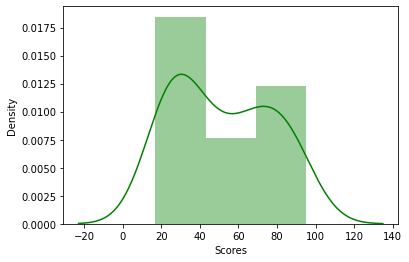

In [6]:
sns.distplot(students_data['Scores'], color="green")

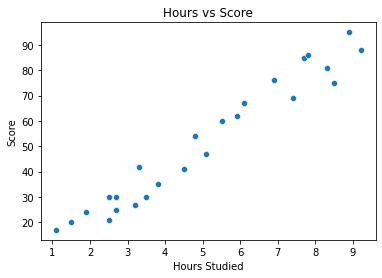

In [7]:
sns.scatterplot(x="Hours", y="Scores", data=students_data)
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

It shows linear relationship between Hours studied and Score.

# Training a Linear Regression Model

First split up our data into an X array that contains the features to train on, and a y array with the target variable.

## X and y arrays

In [8]:
X=students_data.drop("Scores", axis=1)
y=students_data["Scores"]

## Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.
Taking training data 80% and 20% for model testing.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

## Creating and Training the Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [14]:
# intercept and coefficient

c=lm.intercept_
print("Intercept:",c)
print("\n")
m=lm.coef_
print("Coefficient:",m)

Intercept: 2.9422134494963643


Coefficient: [9.74407841]


## Plotting the regression line

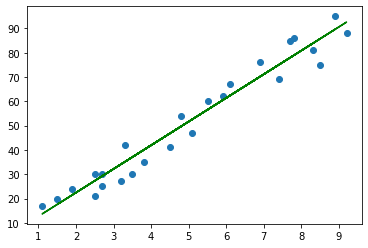

In [22]:
# Plotting the regression line
line = m*X+c   # equation of line y=m*X + c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, c="g");
plt.show()

# Predictions from our Model

In [16]:
y_predictions = lm.predict(X_test)

In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})  

In [18]:
df

,Actual,Predicted
16,30,27.302409
12,41,46.790566
4,30,37.046488
9,25,29.251225
13,42,35.097672


## What will be the predicted score if a student studies for 9.25hours/day?

In [19]:
hours = 9.25

predicted_score = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("\n")
print("Predicted Score = {}".format(predicted_score[0]))

No of Hours = 9.25


Predicted Score = 93.07493874217259


# Regression Evaluation Metrics

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [20]:
from sklearn import metrics

In [21]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_predictions))
print("\n")
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_predictions))
print("\n")
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error (MAE): 5.337639531717945


Mean Squared Error (MSE): 31.235137703452494


Root Mean Squared Error (RMSE): 5.588840461442113


## From our Linear Regression model, if students study 9.25 hrs/day they will score "93.07" marks.